#COVID-19 - Pandemic in India!





##About COVID-19

The **coronavirus (COVID-19)** pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily. The government is working to slow down its spread.


**Corona Virus Explained in Simple Terms:**


![alt text](https://i.imgur.com/nf2kMhF.jpg)

##Problem Statement:

India has responded quickly, implementing a proactive, nationwide, lockdown, to flatten the curve and use the time to plan and resource responses adequately.  Globally the Data Scientists are using AI and machine learning to analyze, predict, and take safety measures against COVID-19 in India. 

### Goal:
We need a explore the COVID situation in India and the world, and strong model that predicts how the virus could spread across India in the next 15 days.
###Tasks to be performed:
- Analyze the present condition in India
- Scrape out the COVID-19 from websites
- Figure out the death rate and cure rate per 100 across the affected states
- Create different charts to visualize the following: 
 - Age group distribution of affected patients
 - Total sample test done till date
 - Growth rate of COVID in top 15 states
 - Top 10 States in each health facility
 - State wise testing insight
- ICMR testing centres in each state
- Use Prophet to predict the confirmed cases in India
- Use ARIMA to predict the confirmed cases in India
- Compare the Indian COVID cases globally

##NOTE: 
Before running the script, ensure-


1.   Upload ICMR Testingdetails Data set
2.   Update the tbody element from website
3.   Change the saving .csv file name to present date



###Importing the required libraries

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mplt
import seaborn as sns
import os
import re
import time
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# PART 1: Analysing the present condition in India


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting 


## How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


## 1.1 Scraping the datasets from the official Govt. website(https://www.mohfw.gov.in)


In [ ]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [ ]:
# get data

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
#print(type(thead))
#print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
#tbody = soup.find_all('tbody')[-1]
#print(tbody)

# get all the rows in table body
# each row is each state's entry
#body = tbody.find_all('tr')
# print(body)

In [ ]:
#get data from inspect element : /html/body/div/div/div/section[3]/div/div/div/div/table/tbody
html_doc='''<tbody><tr><td>1</td><td>Andaman and Nicobar Islands</td><td>100</td><td><span class="down"> 5 <i class="fa fa-arrow-down"></i></span> </td><td>7079</td><td><span class="cup"> 30 <i class="fa fa-arrow-up"></i></span> </td><td>127</td><td><span class="up"> 1 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>2</td><td>Andhra Pradesh</td><td>71466</td><td><span class="down"> 3668 <i class="fa fa-arrow-down"></i></span> </td><td>1743176</td><td><span class="cup"> 10228 <i class="fa fa-arrow-up"></i></span> </td><td>12109</td><td><span class="up"> 57 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>3</td><td>Arunachal Pradesh</td><td>2810</td><td><span class="down"> 39 <i class="fa fa-arrow-down"></i></span> </td><td>29223</td><td><span class="cup"> 289 <i class="fa fa-arrow-up"></i></span> </td><td>155</td><td><span>&nbsp;</span>  </td></tr><tr><td>4</td><td>Assam</td><td>39653</td><td><span class="down"> 1531 <i class="fa fa-arrow-down"></i></span> </td><td>426259</td><td><span class="cup"> 4881 <i class="fa fa-arrow-up"></i></span> </td><td>4064</td><td><span class="up"> 36 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>5</td><td>Bihar</td><td>3991</td><td><span class="down"> 369 <i class="fa fa-arrow-down"></i></span> </td><td>704805</td><td><span class="cup"> 730 <i class="fa fa-arrow-up"></i></span> </td><td>9523</td><td><span class="up"> 9 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>6</td><td>Chandigarh</td><td>462</td><td><span class="down"> 24 <i class="fa fa-arrow-down"></i></span> </td><td>59980</td><td><span class="cup"> 63 <i class="fa fa-arrow-up"></i></span> </td><td>799</td><td><span class="up"> 2 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>7</td><td>Chhattisgarh</td><td>11126</td><td><span class="down"> 591 <i class="fa fa-arrow-down"></i></span> </td><td>964265</td><td><span class="cup"> 1152 <i class="fa fa-arrow-up"></i></span> </td><td>13354</td><td><span class="up"> 12 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>8</td><td>Dadra and Nagar Haveli and Daman and Diu</td><td>65</td><td><span class="up"> 4 <i class="fa fa-arrow-up"></i></span> </td><td>10412</td><td><span class="cup"> 4 <i class="fa fa-arrow-up"></i></span> </td><td>4</td><td><span>&nbsp;</span>  </td></tr><tr><td>9</td><td>Delhi</td><td>2749</td><td><span class="down"> 329 <i class="fa fa-arrow-down"></i></span> </td><td>1404085</td><td><span class="cup"> 516 <i class="fa fa-arrow-up"></i></span> </td><td>24876</td><td><span class="up"> 25 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>10</td><td>Goa</td><td>4044</td><td><span class="down"> 131 <i class="fa fa-arrow-down"></i></span> </td><td>156354</td><td><span class="cup"> 428 <i class="fa fa-arrow-up"></i></span> </td><td>2960</td><td><span class="up"> 13 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>11</td><td>Gujarat</td><td>8242</td><td><span class="down"> 642 <i class="fa fa-arrow-down"></i></span> </td><td>803122</td><td><span class="cup"> 935 <i class="fa fa-arrow-up"></i></span> </td><td>10012</td><td><span class="up"> 5 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>12</td><td>Haryana</td><td>3579</td><td><span class="down"> 124 <i class="fa fa-arrow-down"></i></span> </td><td>753918</td><td><span class="cup"> 334 <i class="fa fa-arrow-up"></i></span> </td><td>9109</td><td><span class="up"> 39 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>13</td><td>Himachal Pradesh</td><td>3733</td><td><span class="down"> 317 <i class="fa fa-arrow-down"></i></span> </td><td>192260</td><td><span class="cup"> 523 <i class="fa fa-arrow-up"></i></span> </td><td>3414</td><td><span class="up"> 4 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>14</td><td>Jammu and Kashmir</td><td>11381</td><td><span class="down"> 1026 <i class="fa fa-arrow-down"></i></span> </td><td>293763</td><td><span class="cup"> 1649 <i class="fa fa-arrow-up"></i></span> </td><td>4217</td><td><span class="up"> 12 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>15</td><td>Jharkhand</td><td>2246</td><td><span class="down"> 400 <i class="fa fa-arrow-down"></i></span> </td><td>336645</td><td><span class="cup"> 587 <i class="fa fa-arrow-up"></i></span> </td><td>5092</td><td><span class="up"> 3 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>16</td><td>Karnataka</td><td>151587</td><td><span class="down"> 10716 <i class="fa fa-arrow-down"></i></span> </td><td>2599472</td><td><span class="cup"> 17913 <i class="fa fa-arrow-up"></i></span> </td><td>33296</td><td><span class="up"> 148 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>17</td><td>Kerala</td><td>110226</td><td><span class="down"> 2566 <i class="fa fa-arrow-down"></i></span> </td><td>2639593</td><td><span class="cup"> 15689 <i class="fa fa-arrow-up"></i></span> </td><td>11655</td><td><span class="up"> 147 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>18</td><td>Ladakh</td><td>538</td><td><span class="down"> 14 <i class="fa fa-arrow-down"></i></span> </td><td>18945</td><td><span class="cup"> 47 <i class="fa fa-arrow-up"></i></span> </td><td>199</td><td><span>&nbsp;</span>  </td></tr><tr><td>19</td><td>Lakshadweep</td><td>447</td><td><span class="down"> 37 <i class="fa fa-arrow-down"></i></span> </td><td>8847</td><td><span class="cup"> 79 <i class="fa fa-arrow-up"></i></span> </td><td>45</td><td><span>&nbsp;</span>  </td></tr><tr><td>20</td><td>Madhya Pradesh</td><td>3273</td><td><span class="down"> 337 <i class="fa fa-arrow-down"></i></span> </td><td>776887</td><td><span class="cup"> 463 <i class="fa fa-arrow-up"></i></span> </td><td>8649</td><td><span class="up"> 34 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>21</td><td>Maharashtra</td><td>139744</td><td><span class="down"> 1696 <i class="fa fa-arrow-down"></i></span> </td><td>5679746</td><td><span class="cup"> 10567 <i class="fa fa-arrow-up"></i></span> </td><td>115390</td><td><span class="up"> 1236 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>22</td><td>Manipur</td><td>9078</td><td><span class="up"> 334 <i class="fa fa-arrow-up"></i></span> </td><td>51762</td><td><span class="cup"> 408 <i class="fa fa-arrow-up"></i></span> </td><td>1008</td><td><span class="up"> 10 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>23</td><td>Meghalaya</td><td>4464</td><td><span class="up"> 34 <i class="fa fa-arrow-up"></i></span> </td><td>38032</td><td><span class="cup"> 453 <i class="fa fa-arrow-up"></i></span> </td><td>758</td><td><span class="up"> 8 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>24</td><td>Mizoram</td><td>3647</td><td><span class="up"> 10 <i class="fa fa-arrow-up"></i></span> </td><td>12414</td><td><span class="cup"> 223 <i class="fa fa-arrow-up"></i></span> </td><td>74</td><td><span class="up"> 3 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>25</td><td>Nagaland</td><td>2699</td><td><span class="down"> 273 <i class="fa fa-arrow-down"></i></span> </td><td>20805</td><td><span class="cup"> 382 <i class="fa fa-arrow-up"></i></span> </td><td>461</td><td><span class="up"> 2 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>26</td><td>Odisha</td><td>42270</td><td><span class="down"> 2088 <i class="fa fa-arrow-down"></i></span> </td><td>817359</td><td><span class="cup"> 5579 <i class="fa fa-arrow-up"></i></span> </td><td>3432</td><td><span class="up"> 44 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>27</td><td>Puducherry</td><td>4495</td><td><span class="down"> 173 <i class="fa fa-arrow-down"></i></span> </td><td>107425</td><td><span class="cup"> 597 <i class="fa fa-arrow-up"></i></span> </td><td>1702</td><td><span class="up"> 6 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>28</td><td>Punjab</td><td>10046</td><td><span class="down"> 756 <i class="fa fa-arrow-down"></i></span> </td><td>564084</td><td><span class="cup"> 1383 <i class="fa fa-arrow-up"></i></span> </td><td>15698</td><td><span class="up"> 48 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>29</td><td>Rajasthan</td><td>4962</td><td><span class="down"> 657 <i class="fa fa-arrow-down"></i></span> </td><td>936586</td><td><span class="cup"> 928 <i class="fa fa-arrow-up"></i></span> </td><td>8865</td><td><span class="up"> 9 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>30</td><td>Sikkim</td><td>2965</td><td><span class="down"> 274 <i class="fa fa-arrow-down"></i></span> </td><td>15556</td><td><span class="cup"> 420 <i class="fa fa-arrow-up"></i></span> </td><td>285</td><td><span class="up"> 1 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>31</td><td>Tamil Nadu</td><td>114335</td><td><span class="down"> 10880 <i class="fa fa-arrow-down"></i></span> </td><td>2244073</td><td><span class="cup"> 21058 <i class="fa fa-arrow-up"></i></span> </td><td>30338</td><td><span class="up"> 270 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>32</td><td>Telangana</td><td>19975</td><td><span class="up"> 42 <i class="fa fa-arrow-up"></i></span> </td><td>584429</td><td><span class="cup"> 1436 <i class="fa fa-arrow-up"></i></span> </td><td>3521</td><td><span class="up"> 11 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>33</td><td>Tripura</td><td>5122</td><td><span class="up"> 236 <i class="fa fa-arrow-up"></i></span> </td><td>55116</td><td><span class="cup"> 246 <i class="fa fa-arrow-up"></i></span> </td><td>634</td><td><span class="up"> 5 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>34</td><td>Uttarakhand</td><td>3572</td><td><span class="down"> 70 <i class="fa fa-arrow-down"></i></span> </td><td>327233</td><td><span class="cup"> 411 <i class="fa fa-arrow-up"></i></span> </td><td>6997</td><td><span class="up"> 12 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>35</td><td>Uttar Pradesh</td><td>6496</td><td><span class="down"> 725 <i class="fa fa-arrow-down"></i></span> </td><td>1674999</td><td><span class="cup"> 927 <i class="fa fa-arrow-up"></i></span> </td><td>21963</td><td><span class="up"> 49 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>36</td><td>West Bengal</td><td>21152</td><td><span class="up"> 1106 <i class="fa fa-arrow-up"></i></span> </td><td>1432961</td><td><span class="cup"> 2012 <i class="fa fa-arrow-up"></i></span> </td><td>17118</td><td><span class="up"> 69 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td colspan="2">Total#</td><td>826740</td><td><span class="down"> 38692 <i class="fa fa-arrow-down"></i></span> </td><td>28491670</td><td><span class="cup">  103570 <i class="fa fa-arrow-up"></i></span> </td><td>381903</td><td><span class="up"> 2330 <i class="fa fa-arrow-up"></i></span></td></tr><tr><td align="center" style="text-align:center;" colspan="8"><strong>*(Including foreign Nationals)</strong></td></tr> <tr><td align="center" style="text-align:center;" colspan="8"><strong>**( more than 70% cases due to comorbidities )</strong></td></tr><tr><td align="center" style="text-align:center;" colspan="8"><strong>#States wise distribution is subject to further verification and reconciliation</strong></td></tr> <tr><td align="center" style="text-align:center;" colspan="8"><strong>#Our figures are being reconciled with ICMR</strong></td></tr></tbody>'''

html_doc='''<tbody><tr><td>1</td><td>Andaman and Nicobar Islands</td><td>105</td><td><span class="down"> 4 <i class="fa fa-arrow-down"></i></span> </td><td>7049</td><td><span class="cup"> 15 <i class="fa fa-arrow-up"></i></span> </td><td>126</td><td><span>&nbsp;</span>  </td></tr><tr><td>2</td><td>Andhra Pradesh</td><td>75134</td><td><span class="down"> 4879 <i class="fa fa-arrow-down"></i></span> </td><td>1732948</td><td><span class="cup"> 10567 <i class="fa fa-arrow-up"></i></span> </td><td>12052</td><td><span class="up"> 53 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>3</td><td>Arunachal Pradesh</td><td>2849</td><td><span class="down"> 40 <i class="fa fa-arrow-down"></i></span> </td><td>28934</td><td><span class="cup"> 326 <i class="fa fa-arrow-up"></i></span> </td><td>155</td><td><span class="up"> 4 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>4</td><td>Assam</td><td>41184</td><td><span class="up"> 475 <i class="fa fa-arrow-up"></i></span> </td><td>421378</td><td><span class="cup"> 2906 <i class="fa fa-arrow-up"></i></span> </td><td>4028</td><td><span class="up"> 34 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>5</td><td>Bihar</td><td>4360</td><td><span class="down"> 412 <i class="fa fa-arrow-down"></i></span> </td><td>704075</td><td><span class="cup"> 813 <i class="fa fa-arrow-up"></i></span> </td><td>9514</td><td><span class="up"> 9 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>6</td><td>Chandigarh</td><td>486</td><td><span class="down"> 21 <i class="fa fa-arrow-down"></i></span> </td><td>59917</td><td><span class="cup"> 58 <i class="fa fa-arrow-up"></i></span> </td><td>797</td><td><span class="up"> 3 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>7</td><td>Chhattisgarh</td><td>11717</td><td><span class="down"> 943 <i class="fa fa-arrow-down"></i></span> </td><td>963113</td><td><span class="cup"> 1544 <i class="fa fa-arrow-up"></i></span> </td><td>13342</td><td><span class="up"> 8 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>8</td><td>Dadra and Nagar Haveli and Daman and Diu</td><td>61</td><td><span class="up"> 2 <i class="fa fa-arrow-up"></i></span> </td><td>10408</td><td><span class="cup"> 7 <i class="fa fa-arrow-up"></i></span> </td><td>4</td><td><span>&nbsp;</span>  </td></tr><tr><td>9</td><td>Delhi</td><td>3078</td><td><span class="down"> 148 <i class="fa fa-arrow-down"></i></span> </td><td>1403569</td><td><span class="cup"> 364 <i class="fa fa-arrow-up"></i></span> </td><td>24851</td><td><span class="up"> 12 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>10</td><td>Goa</td><td>4175</td><td><span class="down"> 231 <i class="fa fa-arrow-down"></i></span> </td><td>155926</td><td><span class="cup"> 548 <i class="fa fa-arrow-up"></i></span> </td><td>2947</td><td><span class="up"> 10 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>11</td><td>Gujarat</td><td>8884</td><td><span class="down"> 658 <i class="fa fa-arrow-down"></i></span> </td><td>802187</td><td><span class="cup"> 1006 <i class="fa fa-arrow-up"></i></span> </td><td>10007</td><td><span class="up"> 4 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>12</td><td>Haryana</td><td>3703</td><td><span class="down"> 374 <i class="fa fa-arrow-down"></i></span> </td><td>753584</td><td><span class="cup"> 564 <i class="fa fa-arrow-up"></i></span> </td><td>9070</td><td><span class="up"> 38 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>13</td><td>Himachal Pradesh</td><td>4050</td><td><span class="down"> 382 <i class="fa fa-arrow-down"></i></span> </td><td>191737</td><td><span class="cup"> 691 <i class="fa fa-arrow-up"></i></span> </td><td>3410</td><td><span class="up"> 12 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>14</td><td>Jammu and Kashmir</td><td>12407</td><td><span class="down"> 1125 <i class="fa fa-arrow-down"></i></span> </td><td>292114</td><td><span class="cup"> 1830 <i class="fa fa-arrow-up"></i></span> </td><td>4205</td><td><span class="up"> 10 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>15</td><td>Jharkhand</td><td>2646</td><td><span class="down"> 416 <i class="fa fa-arrow-down"></i></span> </td><td>336058</td><td><span class="cup"> 596 <i class="fa fa-arrow-up"></i></span> </td><td>5089</td><td><span class="up"> 4 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>16</td><td>Karnataka</td><td>162303</td><td><span class="down"> 9859 <i class="fa fa-arrow-down"></i></span> </td><td>2581559</td><td><span class="cup"> 14785 <i class="fa fa-arrow-up"></i></span> </td><td>33148</td><td><span class="up"> 115 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>17</td><td>Kerala</td><td>112792</td><td><span class="down"> 1456 <i class="fa fa-arrow-down"></i></span> </td><td>2623904</td><td><span class="cup"> 13536 <i class="fa fa-arrow-up"></i></span> </td><td>11508</td><td><span class="up"> 166 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>18</td><td>Ladakh</td><td>552</td><td><span class="down"> 20 <i class="fa fa-arrow-down"></i></span> </td><td>18898</td><td><span class="cup"> 57 <i class="fa fa-arrow-up"></i></span> </td><td>199</td><td><span class="up"> 1 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>19</td><td>Lakshadweep</td><td>484</td><td><span class="down"> 36 <i class="fa fa-arrow-down"></i></span> </td><td>8768</td><td><span class="cup"> 96 <i class="fa fa-arrow-up"></i></span> </td><td>45</td><td><span class="up"> 1 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>20</td><td>Madhya Pradesh</td><td>3610</td><td><span class="down"> 331 <i class="fa fa-arrow-down"></i></span> </td><td>776424</td><td><span class="cup"> 528 <i class="fa fa-arrow-up"></i></span> </td><td>8615</td><td><span class="up"> 27 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>21</td><td>Maharashtra</td><td>141440</td><td><span class="down"> 8982 <i class="fa fa-arrow-down"></i></span> </td><td>5669179</td><td><span class="cup"> 15176 <i class="fa fa-arrow-up"></i></span> </td><td>114154</td><td><span class="up"> 1458 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>22</td><td>Manipur</td><td>8744</td><td><span class="up"> 301 <i class="fa fa-arrow-up"></i></span> </td><td>51354</td><td><span class="cup"> 476 <i class="fa fa-arrow-up"></i></span> </td><td>998</td><td><span class="up"> 8 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>23</td><td>Meghalaya</td><td>4430</td><td><span class="down"> 99 <i class="fa fa-arrow-down"></i></span> </td><td>37579</td><td><span class="cup"> 542 <i class="fa fa-arrow-up"></i></span> </td><td>750</td><td><span class="up"> 7 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>24</td><td>Mizoram</td><td>3637</td><td><span class="down"> 45 <i class="fa fa-arrow-down"></i></span> </td><td>12191</td><td><span class="cup"> 312 <i class="fa fa-arrow-up"></i></span> </td><td>71</td><td><span class="up"> 1 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>25</td><td>Nagaland</td><td>2972</td><td><span class="down"> 229 <i class="fa fa-arrow-down"></i></span> </td><td>20423</td><td><span class="cup"> 327 <i class="fa fa-arrow-up"></i></span> </td><td>459</td><td><span class="up"> 3 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>26</td><td>Odisha</td><td>44358</td><td><span class="down"> 3436 <i class="fa fa-arrow-down"></i></span> </td><td>811780</td><td><span class="cup"> 6799 <i class="fa fa-arrow-up"></i></span> </td><td>3388</td><td><span class="up"> 42 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>27</td><td>Puducherry</td><td>4668</td><td><span class="down"> 279 <i class="fa fa-arrow-down"></i></span> </td><td>106828</td><td><span class="cup"> 629 <i class="fa fa-arrow-up"></i></span> </td><td>1696</td><td><span class="up"> 5 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>28</td><td>Punjab</td><td>10802</td><td><span class="down"> 1111 <i class="fa fa-arrow-down"></i></span> </td><td>562701</td><td><span class="cup"> 1691 <i class="fa fa-arrow-up"></i></span> </td><td>15650</td><td><span class="up"> 48 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>29</td><td>Rajasthan</td><td>5619</td><td><span class="down"> 848 <i class="fa fa-arrow-down"></i></span> </td><td>935658</td><td><span class="cup"> 1006 <i class="fa fa-arrow-up"></i></span> </td><td>8856</td><td><span class="up"> 14 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>30</td><td>Sikkim</td><td>3239</td><td><span class="down"> 67 <i class="fa fa-arrow-down"></i></span> </td><td>15136</td><td><span class="cup"> 273 <i class="fa fa-arrow-up"></i></span> </td><td>284</td><td><span class="up"> 3 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>31</td><td>Tamil Nadu</td><td>125215</td><td><span class="down"> 11669 <i class="fa fa-arrow-down"></i></span> </td><td>2223015</td><td><span class="cup"> 23207 <i class="fa fa-arrow-up"></i></span> </td><td>30068</td><td><span class="up"> 267 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>32</td><td>Telangana</td><td>19933</td><td><span class="down"> 528 <i class="fa fa-arrow-down"></i></span> </td><td>582993</td><td><span class="cup"> 2070 <i class="fa fa-arrow-up"></i></span> </td><td>3510</td><td><span class="up"> 14 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>33</td><td>Tripura</td><td>4886</td><td><span class="down"> 65 <i class="fa fa-arrow-down"></i></span> </td><td>54870</td><td><span class="cup"> 596 <i class="fa fa-arrow-up"></i></span> </td><td>629</td><td><span class="up"> 5 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>34</td><td>Uttarakhand</td><td>3642</td><td><span class="down"> 266 <i class="fa fa-arrow-down"></i></span> </td><td>326822</td><td><span class="cup"> 515 <i class="fa fa-arrow-up"></i></span> </td><td>6985</td><td><span class="up"> 25 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>35</td><td>Uttar Pradesh</td><td>7221</td><td><span class="down"> 890 <i class="fa fa-arrow-down"></i></span> </td><td>1674072</td><td><span class="cup"> 1104 <i class="fa fa-arrow-up"></i></span> </td><td>21914</td><td><span class="up"> 56 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td>36</td><td>West Bengal</td><td>20046</td><td><span class="up"> 1125 <i class="fa fa-arrow-up"></i></span> </td><td>1430949</td><td><span class="cup"> 2068 <i class="fa fa-arrow-up"></i></span> </td><td>17049</td><td><span class="up"> 75 <i class="fa fa-arrow-up"></i></span> </td></tr><tr><td colspan="2">Total#</td><td>865432</td><td><span class="down"> 47946 <i class="fa fa-arrow-down"></i></span> </td><td>28388100</td><td><span class="cup">  107628 <i class="fa fa-arrow-up"></i></span> </td><td>379573</td><td><span class="up"> 2542 <i class="fa fa-arrow-up"></i></span></td></tr><tr><td align="center" style="text-align:center;" colspan="8"><strong>*(Including foreign Nationals)</strong></td></tr> <tr><td align="center" style="text-align:center;" colspan="8"><strong>**( more than 70% cases due to comorbidities )</strong></td></tr><tr><td align="center" style="text-align:center;" colspan="8"><strong>#States wise distribution is subject to further verification and reconciliation</strong></td></tr> <tr><td align="center" style="text-align:center;" colspan="8"><strong>#Our figures are being reconciled with ICMR</strong></td></tr></tbody>'''
doc_soup=BeautifulSoup(html_doc, "html.parser")

tbody = doc_soup.find_all('tbody')[0]
body = tbody.find_all('tr')


In [ ]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
print(head_rows)
print(body_rows)

[[], ['S. No.', 'Name of State / UT', 'Active Cases*', 'Cured/Discharged/Migrated*', 'Deaths**'], ['Total', 'Change since yesterdayChange since yesterday', 'Cumulative', 'Change since yesterday', 'Cumulative', 'Change since yesterday']]
[['1', 'Andaman and Nicobar Islands', '105', ' 4  ', '7049', ' 15  ', '126', '\xa0 '], ['2', 'Andhra Pradesh', '75134', ' 4879  ', '1732948', ' 10567  ', '12052', ' 53  '], ['3', 'Arunachal Pradesh', '2849', ' 40  ', '28934', ' 326  ', '155', ' 4  '], ['4', 'Assam', '41184', ' 475  ', '421378', ' 2906  ', '4028', ' 34  '], ['5', 'Bihar', '4360', ' 412  ', '704075', ' 813  ', '9514', ' 9  '], ['6', 'Chandigarh', '486', ' 21  ', '59917', ' 58  ', '797', ' 3  '], ['7', 'Chhattisgarh', '11717', ' 943  ', '963113', ' 1544  ', '13342', ' 8  '], ['8', 'Dadra and Nagar Haveli and Daman and Diu', '61', ' 2  ', '10408', ' 7  ', '4', '\xa0 '], ['9', 'Delhi', '3078', ' 148  ', '1403569', ' 364  ', '24851', ' 12  '], ['10', 'Goa', '4175', ' 231  ', '155926', ' 548  

In [ ]:
#modify head_rows, for twice appearance of change since yesterday
head_rows[2][1]='Change since yesterday'
print(head_rows)

[[], ['S. No.', 'Name of State / UT', 'Active Cases*', 'Cured/Discharged/Migrated*', 'Deaths**'], ['Total', 'Change since yesterday', 'Cumulative', 'Change since yesterday', 'Cumulative', 'Change since yesterday']]


In [ ]:
# save contents in a dataframe
# ============================


# skip last 5 rows, it contains unwanted info
brows=body_rows[0:len(body_rows)-5]
#removing unwanted coumns in body_rows in accordance with head_rows
for inner in brows:
  i2d=[7,5,3]
  for j in i2d:
    del inner[j]
#print(brows)  


# head_rows contains column title

df_bs = pd.DataFrame(brows,  columns=head_rows[1])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(5)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**
0,Andaman and Nicobar Islands,105,7049,126
1,Andhra Pradesh,75134,1732948,12052
2,Arunachal Pradesh,2849,28934,155
3,Assam,41184,421378,4028
4,Bihar,4360,704075,9514


# Data Cleaning

In [ ]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [ ]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [ ]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(5)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,105,7049,126,2021-06-17,11.7401,92.6586
1,Andhra Pradesh,75134,1732948,12052,2021-06-17,15.9129,79.7400
2,Arunachal Pradesh,2849,28934,155,2021-06-17,28.2180,94.7278
3,Assam,41184,421378,4028,2021-06-17,26.2006,92.9376
4,Bihar,4360,704075,9514,2021-06-17,25.0961,85.3131


In [ ]:
# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [ ]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [ ]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Date                          0
Latitude                      3
Longitude                     3
dtype: int64

In [ ]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Date                          0
Latitude                      3
Longitude                     3
dtype: int64

In [ ]:
# number of unique values 
df_India.nunique()

State/UnionTerritory          36
Active Cases*                 36
Cured/Discharged/Migrated*    36
Deaths                        36
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

# Saving data

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a csv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)

In [ ]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [ ]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

##Final Dataframe

In [ ]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,105,7049,126,2021-06-17,11.7401,92.6586
1,Andhra Pradesh,75134,1732948,12052,2021-06-17,15.9129,79.7400
2,Arunachal Pradesh,2849,28934,155,2021-06-17,28.2180,94.7278
3,Assam,41184,421378,4028,2021-06-17,26.2006,92.9376
4,Bihar,4360,704075,9514,2021-06-17,25.0961,85.3131
5,Chandigarh,486,59917,797,2021-06-17,30.7333,76.7794
6,Chhattisgarh,11717,963113,13342,2021-06-17,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,61,10408,4,2021-06-17,NaN,NaN
8,Delhi,3078,1403569,24851,2021-06-17,28.7041,77.1025
9,Goa,4175,155926,2947,2021-06-17,15.2993,74.1240


In [ ]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        36 non-null     object        
 1   Active Cases*               36 non-null     object        
 2   Cured/Discharged/Migrated*  36 non-null     object        
 3   Deaths                      36 non-null     object        
 4   Date                        36 non-null     datetime64[ns]
 5   Latitude                    33 non-null     float64       
 6   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.1+ KB


##Save as .csv file

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/2021_06_17 - COVID-19_India_preprocessed.csv')        #change to present date
df_india = df.copy()                                                            #this was used later in folium

## 1.2 Analysing COVID19 Cases in INDIA

In [ ]:
total_cases = df['Active Cases*'].sum()
total_cases+=df['Cured/Discharged/Migrated*'].sum()
total_cases+=df['Deaths'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (14th June, 2021):', total_cases)   ##CHANGE HERE

Total number of confirmed COVID 2019 cases across India till date (14th June, 2021): 29633105


In [ ]:
#highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths
0,Andaman and Nicobar Islands,105,7049,126
1,Andhra Pradesh,75134,1732948,12052
2,Arunachal Pradesh,2849,28934,155
3,Assam,41184,421378,4028
4,Bihar,4360,704075,9514
5,Chandigarh,486,59917,797
6,Chhattisgarh,11717,963113,13342
7,Dadra and Nagar Haveli and Daman and Diu,61,10408,4
8,Delhi,3078,1403569,24851
9,Goa,4175,155926,2947


In [ ]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
#total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = df['Active Cases*'].sum()
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2021_06_17 are:  28388100
Total people who were detected COVID+ve as of 2021_06_17 are:  29633105
Total people who died due to COVID19 as of 2021_06_17 are:  379573
Total active COVID19 cases as of 2021_06_17 are:  865432


In [ ]:
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Active Cases*'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 865432


,Active Cases*
State/UnionTerritory,
Karnataka,162303
Maharashtra,141440
Tamil Nadu,125215
Kerala,112792
Andhra Pradesh,75134
Odisha,44358
Assam,41184
West Bengal,20046
Telangana,19933


In [ ]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Active Cases*','Deaths','Cured/Discharged/Migrated*'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Confirmed'] = state_cases['Active Cases*'] + (state_cases['Deaths']+state_cases['Cured/Discharged/Migrated*'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured/Discharged/Migrated*"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured/Discharged/Migrated*"])\
                        .background_gradient(cmap='Blues',subset=["Active Cases*"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Active Cases*,Deaths,Cured/Discharged/Migrated*,Confirmed,Death Rate (per 100),Cure Rate (per 100)
20,Maharashtra,141440,114154,5669179,5924773,1.930000,95.690000
15,Karnataka,162303,33148,2581559,2777010,1.190000,92.960000
16,Kerala,112792,11508,2623904,2748204,0.420000,95.480000
30,Tamil Nadu,125215,30068,2223015,2378298,1.260000,93.470000
1,Andhra Pradesh,75134,12052,1732948,1820134,0.660000,95.210000
33,Uttar Pradesh,7221,21914,1674072,1703207,1.290000,98.290000
35,West Bengal,20046,17049,1430949,1468044,1.160000,97.470000
8,Delhi,3078,24851,1403569,1431498,1.740000,98.050000
6,Chhattisgarh,11717,13342,963113,988172,1.350000,97.460000
28,Rajasthan,5619,8856,935658,950133,0.930000,98.480000




##Number of ICMR Testing Centres in each state

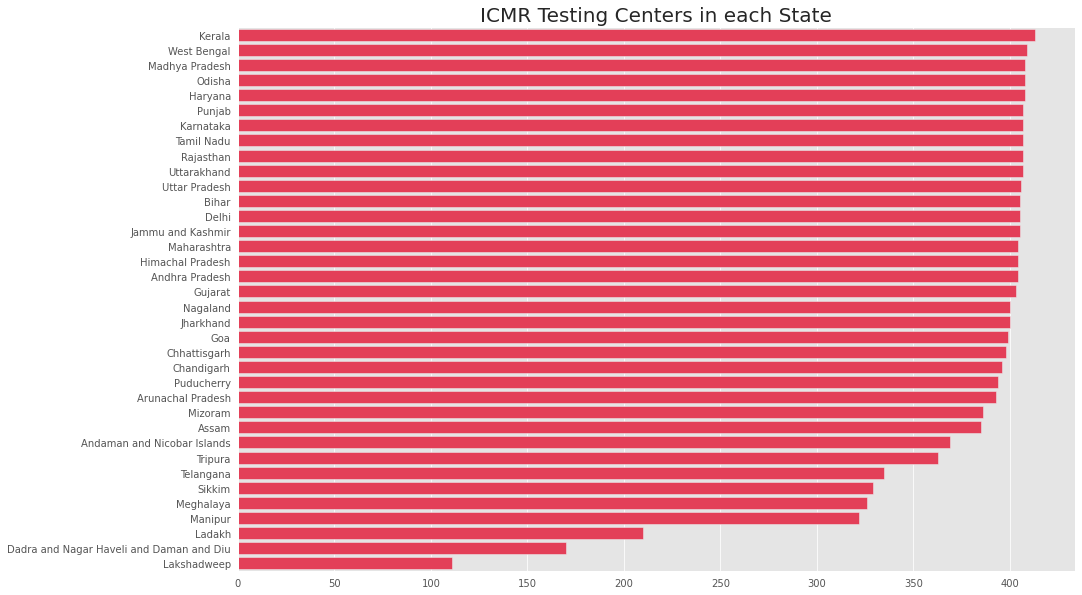

In [ ]:
ICMR_labs = pd.read_csv('/content/ICMRTestingDetails.csv')  #upload



values = list(ICMR_labs['State'].value_counts())
names = list(ICMR_labs['State'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

## Testing Status

In [ ]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [ ]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,bedsoccupiednormalisolation,casesoutsidehomeisolationi.einstitutionalisolationhospitaletc.,covidenquirycalls,cumulativenumberofasymptomaticcases,cumulativenumberofsymptomaticcases,cumulativepeopleinhomeisolation,cumulativepeopleinobservation,cumulativepeopleinquarantine,cumulativepeopleinsurveillance,femaleconfirmedcases,femaledeceasedcases,maleconfirmedcases,maledeceasedcases,negative,numberofcontainmentzones,othertests,peopleonicubeds,peopleono2beds,peopleonventilator,peoplereleasedfromhomeisolation,peoplereleasedfromobservation,peoplereleasedfromsurveillance,positive,ratrapidantigentest,rt-pcrtestincludestruenatcbnaatcrispr,source1,source2,source3,source4,state,tagnatureofcases,tagpeopleinisolation,tagpeopleinquarantine,tagpeopleinquarantine_2,tagpeopleinsurveillance,tagtotaltested,totaln95masks,totalnumbedsnormalisolation,totalnumicubeds,totalnumofo2beds,totalnumventilators,totalpeoplecurrentlyinisolation,totalpeoplecurrentlyinquarantine,totalpeoplecurrentlyinsurveillance,totalpeoplequarantined,totalpeoplereleasedfromquarantine,totalppe,totaltested,transgenderconfirmedcases,transgenderdeceasedcases,unconfirmed,unknownconfirmedcases,unknowndeceasedcases,unknownnatureofcases,updatedon
14432,16.82%,,,,,,,,,,,,,,,,,,,,,,,5556042,7739814,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,,West Bengal,,,,,,Tested,5655040,24721,3566,,1298,,,,,,3088262,13295856,,,,,,,13/06/2021
14433,16.03%,,,,,,,,,,,,,,,,,,,,,,,5589066,7761018,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,,West Bengal,,,,,,Tested,5655040,24721,3566,,1298,,,,,,3088262,13350084,,,,,,,14/06/2021
14434,15.12%,,,,,,,,,,,,,,,,,,,,,,,5625422,7780307,wbhealth.gov.in/uploaded_files/corona/WB_DHFW_...,https://www.wbhealth.gov.in/pages/corona/bulletin,,,West Bengal,,,,,,Tested,5655040,24721,3566,,1298,,,,,,3088262,13405729,,,,,,,15/06/2021
14435,14.36%,,,,,,,,,,,,,,,,,,,,,,,5660586,7807124,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,,West Bengal,,,,,,Tested,5655040,24721,3566,,1298,,,,,,3088262,13467710,,,,,,,16/06/2021
14436,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,West Bengal,,,,,,,,,,,,,,,,,,,,,,,,,18/06/2021


In [ ]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [ ]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [ ]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested',	'totalpeoplecurrentlyinquarantine'].max().reset_index()

In [ ]:
state_test_cases.tail(5)

,updatedon,state,totaltested,totalpeoplecurrentlyinquarantine
14431,2021-12-06,Telangana,16632289,
14432,2021-12-06,Tripura,1126067,
14433,2021-12-06,Uttar Pradesh,53055495,
14434,2021-12-06,Uttarakhand,5102496,
14435,2021-12-06,West Bengal,13235743,


In [ ]:
state_test_cases = tested.groupby('state')['totaltested','totalpeoplecurrentlyinquarantine'].max()
#state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [ ]:
state_test_cases.nunique()

totaltested                         36
totalpeoplecurrentlyinquarantine    24
dtype: int64

In [ ]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                                .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,totalpeoplecurrentlyinquarantine
state,,
Odisha,9997140,nan
Punjab,9996859,1711.000000
Delhi,9996032,nan
Assam,9982316,989.000000
Rajasthan,9973974,nan
Maharashtra,9965119,9799.000000
Telangana,9961154,nan
Bihar,9960104,802.000000
Tamil Nadu,9956210,48.000000


#More Insights using Master Database

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [ ]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))

dates_india = dates[8:]

In [ ]:
dates2= list(deaths_df.columns[4:])
dates2= list(pd.to_datetime(dates2))

dates3= list(recovered_df.columns[4:])
dates3= list(pd.to_datetime(dates3))

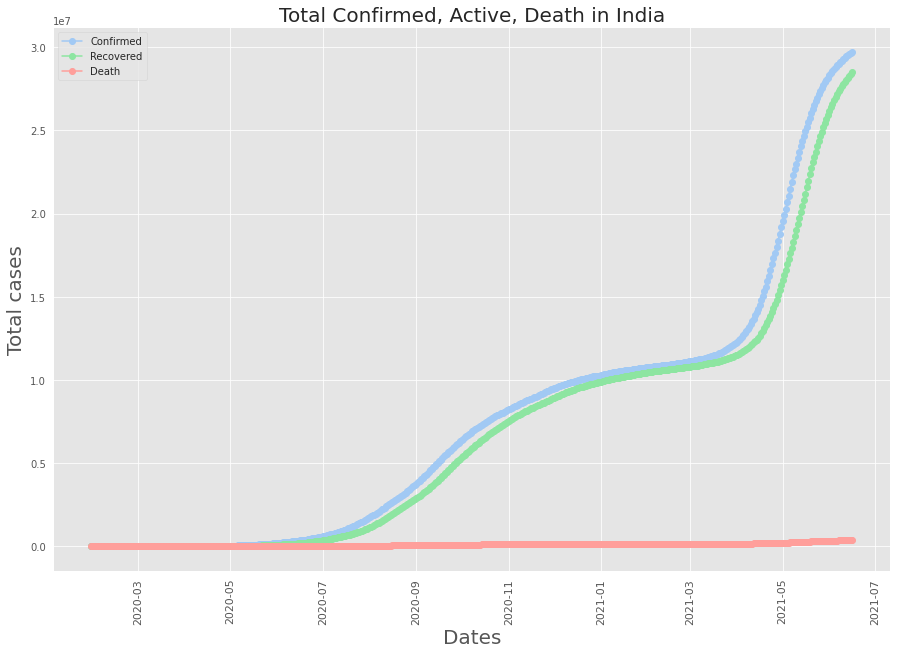

In [ ]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0]    #converting to python list

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

# PART 2 : Let's Start with Prediction

Loading [data1](https://github.com/datasets/covid-19/blob/main/data/time-series-19-covid-combined.csv)  or [data2](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

In [ ]:
'''train = pd.read_csv('/content/train1406.csv')  #Id, Date, Country/Region, Province/State, Confirmed, Recovered, Deaths
test = pd.read_csv('/content/test1406.csv') # ForecastId, Province_State, Country_Region, Date
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
test=None
train=None'''

"train = pd.read_csv('/content/train1406.csv')  #Id, Date, Country/Region, Province/State, Confirmed, Recovered, Deaths\ntest = pd.read_csv('/content/test1406.csv') # ForecastId, Province_State, Country_Region, Date\ntrain['Date'] = pd.to_datetime(train['Date'])\ntest['Date'] = pd.to_datetime(test['Date'])\ntest=None\ntrain=None"


## **PROPHET**
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
!pip install Prophet

In [ ]:
#df1.head(80)
df1.loc[78:80]    

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21
78,Iceland,64.963100,-19.02080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6506,6506,6519,6522,6526,6526,6537,6537,6537,6548,6549,6551,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555,6555
79,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,22296081,22662575,22992517,23340938,23703665,24046809,24372907,24684077,24965463,25228996,25496330,25772440,26031991,26289290,26530132,26752447,26948874,27157795,27369093,27555457,27729247,27894800,28047534,28175044,28307832,28441986,28574350,28694879,28809339,28909975,28996473,29089069,29182532,29274823,29359155,29439989,29510410,29570881,29633105,29700313
80,Indonesia,-0.789300,113.92130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1709762,1713684,1718575,1723596,1728204,1731652,1734285,1736670,1739750,1744045,1748230,1753101,1758898,1764644,1769940,1775220,1781127,1786187,1791221,1797499,1803361,1809926,1816041,1821703,1826527,1831773,1837126,1843612,1850206,1856038,1863031,1869325,1877050,1885942,1894025,1901490,1911358,1919547,1927708,1937652


###Framing the data

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

#confirmed
k1 = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k1.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

#deaths
k2 = df2[df2['Country/Region']=='India'].loc[:,'1/22/20':]
india_deaths = k2.values.tolist()[0] 
data2 = pd.DataFrame(columns = ['ds','y'])
data2['ds'] = dates2
data2['y'] = india_deaths

#confirmed
k3 = df3[df3['Country/Region']=='India'].loc[:,'1/22/20':]
india_recovered = k3.values.tolist()[0] 
data3 = pd.DataFrame(columns = ['ds','y'])
data3['ds'] = dates3
data3['y'] = india_recovered

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
#confirmed
data.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
data['ds'] = pd.to_datetime(data['ds'])

#deaths
data2.columns = ['ds','y']
data2['ds'] = pd.to_datetime(data2['ds'])

#recovered
data3.columns = ['ds','y']
data3['ds'] = pd.to_datetime(data3['ds'])

###Training and Predicting Data

In [ ]:
#confirmed
prop = Prophet(interval_width=0.95)
prop.fit(data)   #fitting into view, training the data, now prop is trained model
future = prop.make_future_dataframe(periods=15)
#future.tail(15)

#deaths
prop2 = Prophet(interval_width=0.95)
prop2.fit(data2)
future2 = prop2.make_future_dataframe(periods=15)
#future2.tail(15)

#recovered
prop3 = Prophet(interval_width=0.95)
prop3.fit(data3)
future3 = prop3.make_future_dataframe(periods=15)
future3.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
512,2021-06-17
513,2021-06-18
514,2021-06-19
515,2021-06-20
516,2021-06-21
517,2021-06-22
518,2021-06-23
519,2021-06-24
520,2021-06-25
521,2021-06-26


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting future CONFIRMED cases with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
522,2021-06-27,3.192678e+07,3.021479e+07,3.346847e+07
523,2021-06-28,3.211840e+07,3.048851e+07,3.377585e+07
524,2021-06-29,3.231498e+07,3.058223e+07,3.406653e+07
525,2021-06-30,3.251733e+07,3.089212e+07,3.436846e+07
526,2021-07-01,3.272039e+07,3.112334e+07,3.444825e+07


In [ ]:
#predicting the future DEATHS cases with date, and upper and lower limit of y value
forecast2 = prop2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
522,2021-06-27,359530.102104,333738.034904,385012.669471
523,2021-06-28,361515.372031,333546.239143,386071.498968
524,2021-06-29,363597.448301,339056.430905,389479.207376
525,2021-06-30,365684.619228,339871.238943,389713.521696
526,2021-07-01,367200.993997,340173.563387,391852.213201


In [ ]:
#predicting the future RECOVERED cases with date, and upper and lower limit of y value
forecast3 = prop3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
522,2021-06-27,2.804352e+07,2.594841e+07,3.002284e+07
523,2021-06-28,2.821573e+07,2.637556e+07,3.049713e+07
524,2021-06-29,2.838631e+07,2.636524e+07,3.049830e+07
525,2021-06-30,2.855818e+07,2.656468e+07,3.054839e+07
526,2021-07-01,2.869824e+07,2.674168e+07,3.080152e+07


###Plot of Prediction Curves

Confirmed Forecast

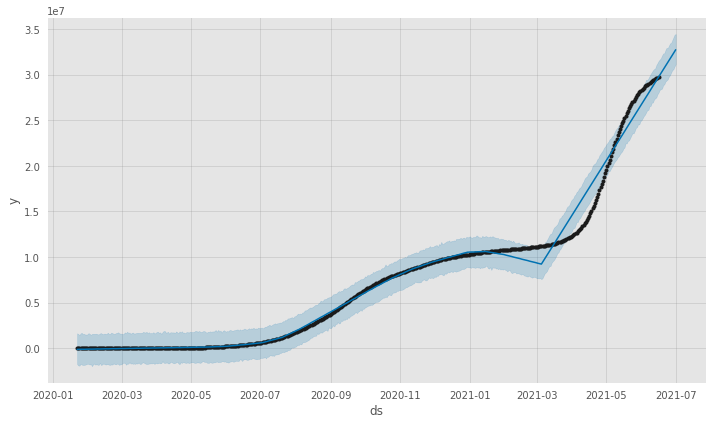

In [ ]:
#Required Plot
confirmed_forecast_plot = prop.plot(forecast) 

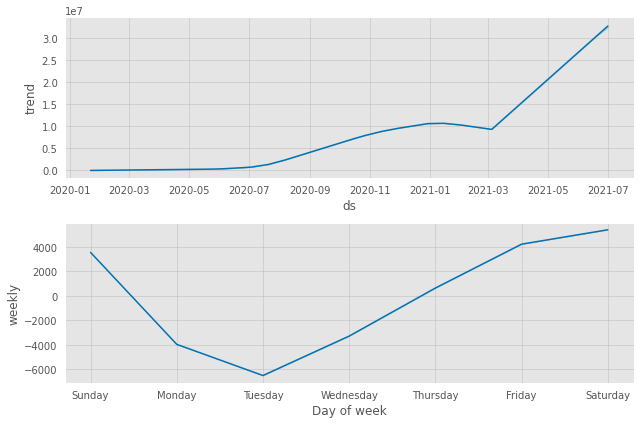

In [ ]:
#plotting the components
confirmed_forecast_plot =prop.plot_components(forecast) 

Death Forecast

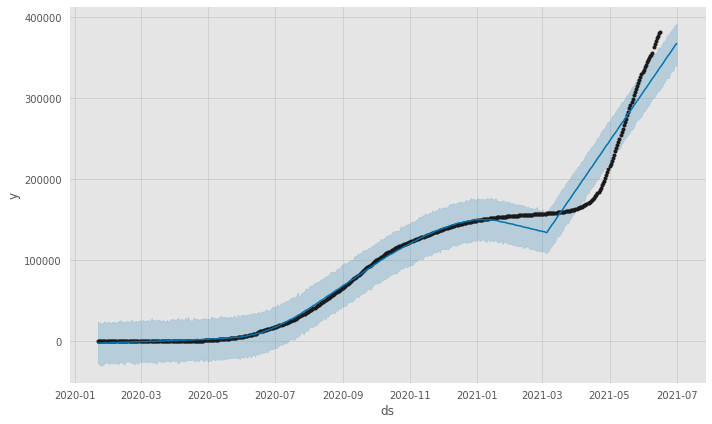

In [ ]:
#Required Plot
death_forecast_plot = prop2.plot(forecast2)

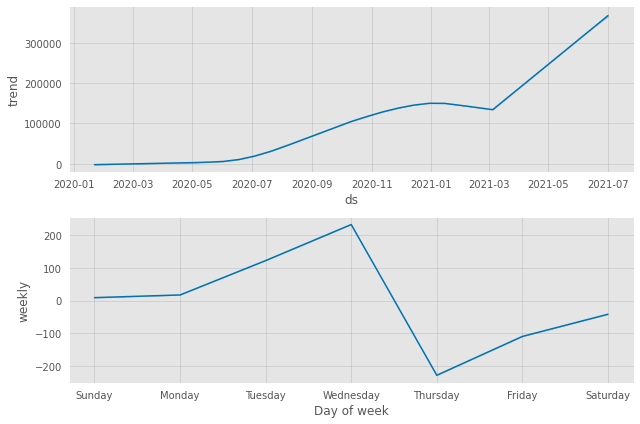

In [ ]:
#plotting the components
death_forecast_plot =prop2.plot_components(forecast2)

Recovered forecast

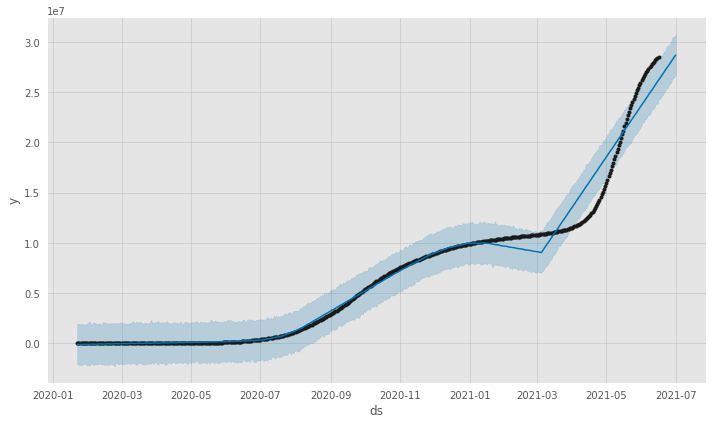

In [ ]:
#Required Plot
recovered_forecast_plot = prop3.plot(forecast3)

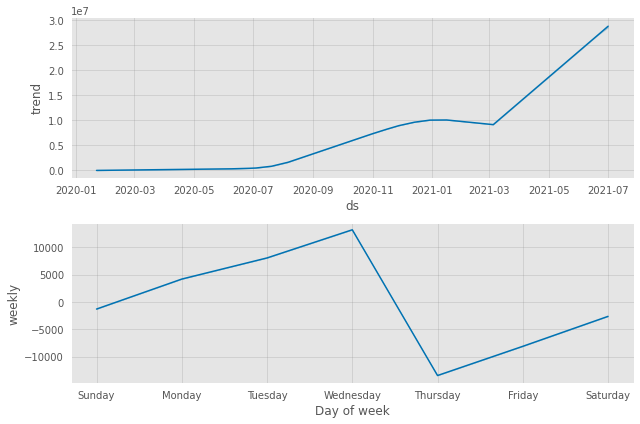

In [ ]:
#plotting the components
recovered_forecast_plot =prop3.plot_components(forecast3)

###Performance Metrics

Here analysed the performance metrics of *Recovered Cases Forecasting* only

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prop, initial='248 days', period='15 days', horizon = '90 days')
df_cv.head()

INFO:prophet:Making 12 forecasts with cutoffs between 2020-10-04 00:00:00 and 2021-03-18 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-10-05,6.667136e+06,6.597275e+06,6.731098e+06,6685082,2020-10-04
1,2020-10-06,6.748188e+06,6.676172e+06,6.816500e+06,6757131,2020-10-04
2,2020-10-07,6.831703e+06,6.765616e+06,6.901061e+06,6835655,2020-10-04
3,2020-10-08,6.915091e+06,6.847748e+06,6.984946e+06,6906151,2020-10-04
4,2020-10-09,6.997772e+06,6.927125e+06,7.066859e+06,6979423,2020-10-04


In [ ]:
#custom cutoffs
cutoffs = pd.to_datetime(['2020-11-20', '2020-11-25', '2020-11-30'])
df_cv2 = cross_validation(prop, cutoffs=cutoffs, horizon='10 days')
df_cv2.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-11-21,9.376678e+06,9.239971e+06,9.507644e+06,9095806,2020-11-20
1,2020-11-22,9.434295e+06,9.297215e+06,9.574288e+06,9139865,2020-11-20
2,2020-11-23,9.489501e+06,9.359785e+06,9.615454e+06,9177840,2020-11-20
3,2020-11-24,9.547500e+06,9.407006e+06,9.684932e+06,9222216,2020-11-20
4,2020-11-25,9.607619e+06,9.461678e+06,9.739534e+06,9266705,2020-11-20
5,2020-11-26,9.667098e+06,9.534917e+06,9.815542e+06,9309787,2020-11-20
6,2020-11-27,9.726525e+06,9.583449e+06,9.878476e+06,9351109,2020-11-20
7,2020-11-28,9.791957e+06,9.648967e+06,9.928966e+06,9392919,2020-11-20
8,2020-11-29,9.849574e+06,9.696569e+06,1.000289e+07,9431691,2020-11-20
9,2020-11-30,9.904780e+06,9.749472e+06,1.006964e+07,9462809,2020-11-20


In [ ]:
from prophet.diagnostics import performance_metrics
#To compute useful statistics of prediction performance
df_p = performance_metrics(df_cv2)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,5.641391e+10,237516.130251,235016.886929,0.025339,0.024279,0.025014,0.0
1,2 days,6.395090e+10,252885.160069,250780.837610,0.026912,0.025841,0.026547,0.0
2,3 days,7.222244e+10,268742.338132,266687.017480,0.028497,0.027230,0.028089,0.0
3,4 days,8.048879e+10,283705.466654,281892.545986,0.029987,0.028778,0.029537,0.0
4,5 days,9.052650e+10,300876.227071,299245.848530,0.031702,0.030781,0.031200,0.0


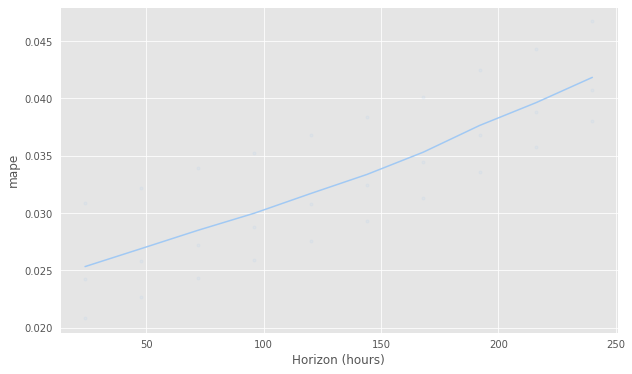

In [ ]:
#can check for mse, rmse, mae, mape, mdape, smape plots
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='mape')


## **ARIMA**

In [ ]:
!pip install pmdarima

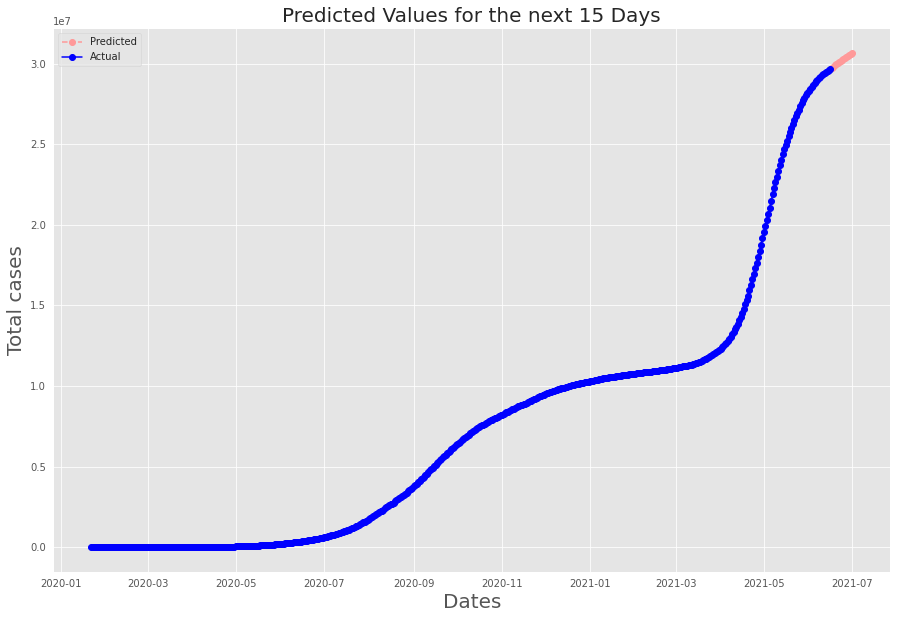

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0)) #(P,D,Q) #RSS is best
arima = arima.fit(trend='c', full_output=True, disp=True) #try for series format
forecast = arima.forecast(steps= 15)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(15):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [ ]:
#check
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  511
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5295.295
Method:                       css-mle   S.D. of innovations           7623.030
Date:                Thu, 17 Jun 2021   AIC                          10604.591
Time:                        15:27:17   BIC                          10634.246
Sample:                             1   HQIC                         10616.217
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.812e+04   4.44e+04      1.309      0.191   -2.89e+04    1.45e+05
ar.L1.D.y      1.1406      0.044     25.874      0.000       1.054       1.227
ar.L2.D.y     -0.2116      0.067     -3.161      0.002      -0.343      -0.080
ar.L3.D.y      0.2183      0.067      3.265      0.001       0.087       0.349
ar.L4.D.y     -0.0830      0.067     -1.241      0.215      -0.214       0.048
ar.L5.D.y     -0.0707      0.044     -1.603      0.110      -0.157       0.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0094           -0.0000j            1.0094           -0.0000
AR.2            1.5148           -0.0000j            1.5148           -0.0000
AR.3           -0.2821           -1.6946j            1.7179           -0.2763
AR.4           -0.2821           +1.6946j            1.7179            0.2763
AR.5           -3.1347           -0.0000j            3.1347           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
import pmdarima as pm

#from pm import auto_arima
#

In [ ]:
stepwise_fit = auto_arima(data['y'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

#Part 3:  Exploring World wide data


##3.1 Folium Map

###Spread in India - Total Confirmed

In [ ]:
#df_india is a copy from saved .csv file 
df_ind=df_india.copy()      #for reconstructing data

In [ ]:


#  Use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')


df_ind['confirmed']=df_ind['Active Cases*'] + (df_ind['Deaths']+df_ind['Cured/Discharged/Migrated*'])
df_ind = df_ind.drop([7, 18, 31])    # delete those rows with no longitude and latitude

for lat, lon, value, name in zip(df_ind['Latitude'], df_ind['Longitude'], df_ind['confirmed'], df_ind['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.000005, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)

map

## 3.2 Visualizing: Worldwide COVID-19 cases  

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
dates


In [ ]:
#####       Don't RUN

hotspots = ['China','Germany','Iran','Italy','Spain','US','Brazil','United Kingdom','India','Korea, South','France']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mplt.dates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [ ]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

#PART-4 : Vaccination Progress

##World

###Analysis

In [ ]:
df_vacc= pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
#df.head(5)

In [ ]:
df_vacc.describe()

In [ ]:
df_vacc.info()

In [ ]:
#converting date(column) to 'date' datatype
df_vacc["date"]= pd.to_datetime(df_vacc.date)



In [ ]:
#Most vaccinated Countries(in terms of vaccines administered)
df_vacc["Total_vaccinations(count)"]= df_vacc.groupby("location").total_vaccinations.tail(1)

df_most=df_vacc.groupby("location")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
df_most.head(15)

In [ ]:
#Top countries with fully vaccinated people
df_vacc["Full_vaccinations(count)"]= df_vacc.groupby("location").people_fully_vaccinated.tail(1)

df_full=df_vacc.groupby("location")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
#df_full

###Visualisation

In [ ]:
#Barplot of most vaccinated locations

sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(df_most.values,df_most.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

In [ ]:
#Dataframe for top 5 vaccinated countries
df_top5= df_vacc.loc[(df_vacc.location== "China") | (df_vacc.location== "United States") | (df_vacc.location== "India") | (df_vacc.location== "Brazil") | (df_vacc.location== "Unted Kingdom")]

In [ ]:
#Comparision of top 5 vaccinated countries

plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= df_top5,hue= "location")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()

In [ ]:
#Barplot of top countries in terms of fully vaccinated people

plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(df_full.values,df_full.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()

In [ ]:
#Plot of Total Vaccinations

#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df_vacc)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

In [ ]:
#Plot of daily vaccinations

df_daily= df_vacc.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(df_daily.index,df_daily.values)
plt.xlabel("Date")
plt.show()

In [ ]:
#Countries with high daily average vaccinations
df_daily_avg= df_vacc.groupby("location").daily_vaccinations.mean().sort_values(ascending= False).head(20)
#df_daily_avg

#Plot of df_daily_avg

plt.figure(figsize= (6,6))
ax= sns.barplot(df_daily_avg.values,df_daily_avg.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

In [ ]:
#Countries which high number of 'people per million'
df_vacc["Total_vaccinations_per_hundred"]= df_vacc.groupby("location").total_vaccinations_per_hundred.tail(1)

df_ppm= df_vacc.groupby("location")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
#Plot of df_ppm

plt.figure(figsize= (5,5))
ax= sns.barplot(df_ppm.values,df_ppm.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()


##Indian Vaccination Drive

In [ ]:
#Total vaccinations in India

plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations(Cumulative)")
plt.title("Total vaccinations in India")
sns.lineplot(x= "date",y= "total_vaccinations",data= df_vacc[df_vacc["location"]=="India"])
plt.show()

In [ ]:
#Daywise vaccinations in India

plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daywise Vaccinations")
plt.title("Vaccinations in India")
sns.lineplot(x= "date",y= "daily_vaccinations",data= df_vacc[df_vacc.location== "India"])
plt.show()

#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.worldometers.info/coronavirus/#countries
- https://api.covid19india.org/

#More Details